In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
from scipy import interpolate
PI=math.pi

In [2]:
### Некоторые неменяющиеся величины для сцинтиллятора в основании
photon=np.arange(234).reshape(26,9)
errph=np.arange(234).reshape(26,9)
angle=np.array([10.,20.,30.,40.,45.,50.,60.,70.,80.])
distance=np.array([float(i) for i in range (50,-2,-2)])
r_min=np.array([float(i-1) for i in range (2,54,2)])
for i in range (24,-1,-1): r_min[i+1]=r_min[i]
r_min[0]=0
r_max=np.array([float(math.fabs(i-1)) for i in range(0,52,2)])
for i in range (25): r_max[i]=r_max[i+1]
r_max[25]=50

### Некоторые неменяющиеся величины для сцинтиллятора на поверхности конуса
photon1=np.arange(198).reshape(22,9)
errph1=np.arange(198).reshape(22,9)
distance1=np.array([float(i) for i in range (50,6,-2)])
r_min1=np.array([float(i-1) for i in range (8,52,2)])
r_max1=np.array([float(math.fabs(i-1)) for i in range(8,52,2)])
for i in range (21): r_max1[i]=r_max1[i+1]
r_max1[21]=50

### Функция коэффициента детерминации
def determination(x,y,z):
    sigmsq=1/len(y)*sum((y[:]-z[0]*(x[:])**2 - z[1]*(x[:]) - z[2])**2)
    middle=1/len(y)*sum(y)
    sigmsqy=1/len(y)*sum((y-middle)**2)
    hisqr=(1-sigmsq/sigmsqy)
    hisqrcorrected=(1-(1-hisqr)*(len(y)-1)/(len(y)-3))
    if (hisqr<0) : print('Качество приближения - выколите мне глаза 1 - %f' %(hisqr))
    elif (hisqrcorrected<0): print('Качество приближения - выколите мне глаза 2 - %f' %(hisqrcorrected))
    elif ((hisqrcorrected < hisqr) & (hisqrcorrected>0.8)): print('Качество приближения очень хорошее - %f' %(hisqrcorrected))   
    elif ((hisqrcorrected < hisqr) & (hisqrcorrected<0.8)): print('Качество приближения приемлимое - %f' %(hisqrcorrected))   
    else: print('Что не так-то')

##  Испльзуемые папки: deegres1, deegres2, deegres3, deegres4, deegres5, deegres6, deegres7, deegres8

## deegres1 -  в этой папке конусы от 10 до 80 градусов
## Отражение диффузное
## Отражение основания - 0.99, отражение стенок - 0.95
## Запускалось по 100000

D:\figures\конус\deegres1\10.txt
D:\figures\конус\deegres1\20.txt
D:\figures\конус\deegres1\30.txt
D:\figures\конус\deegres1\40.txt
D:\figures\конус\deegres1\45.txt
D:\figures\конус\deegres1\50.txt
D:\figures\конус\deegres1\60.txt
D:\figures\конус\deegres1\70.txt
D:\figures\конус\deegres1\80.txt
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.992511
Функция аппроксимирующей кривой y=-0.000215x^2+-1.142155x+74.484609
Иттегральный коэффициент светосбора 55.508263 +/- 0.232940
Среднее число собранных фотонов 5550.826280 +/- 23.294000 
Значение критерия 1 - 0.770869  +/- 0.001983 
Значение критерия 2 - 0.138828  +/- 0.016662 
-------------------------------------------------------------------
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.991987
Функция аппроксимирующей кривой y=0.001689x^2+-0.409885x+34.202448
Иттегральный коэффициент светосбора 28.091492 +/- 0.166820
Сре

<ErrorbarContainer object of 3 artists>

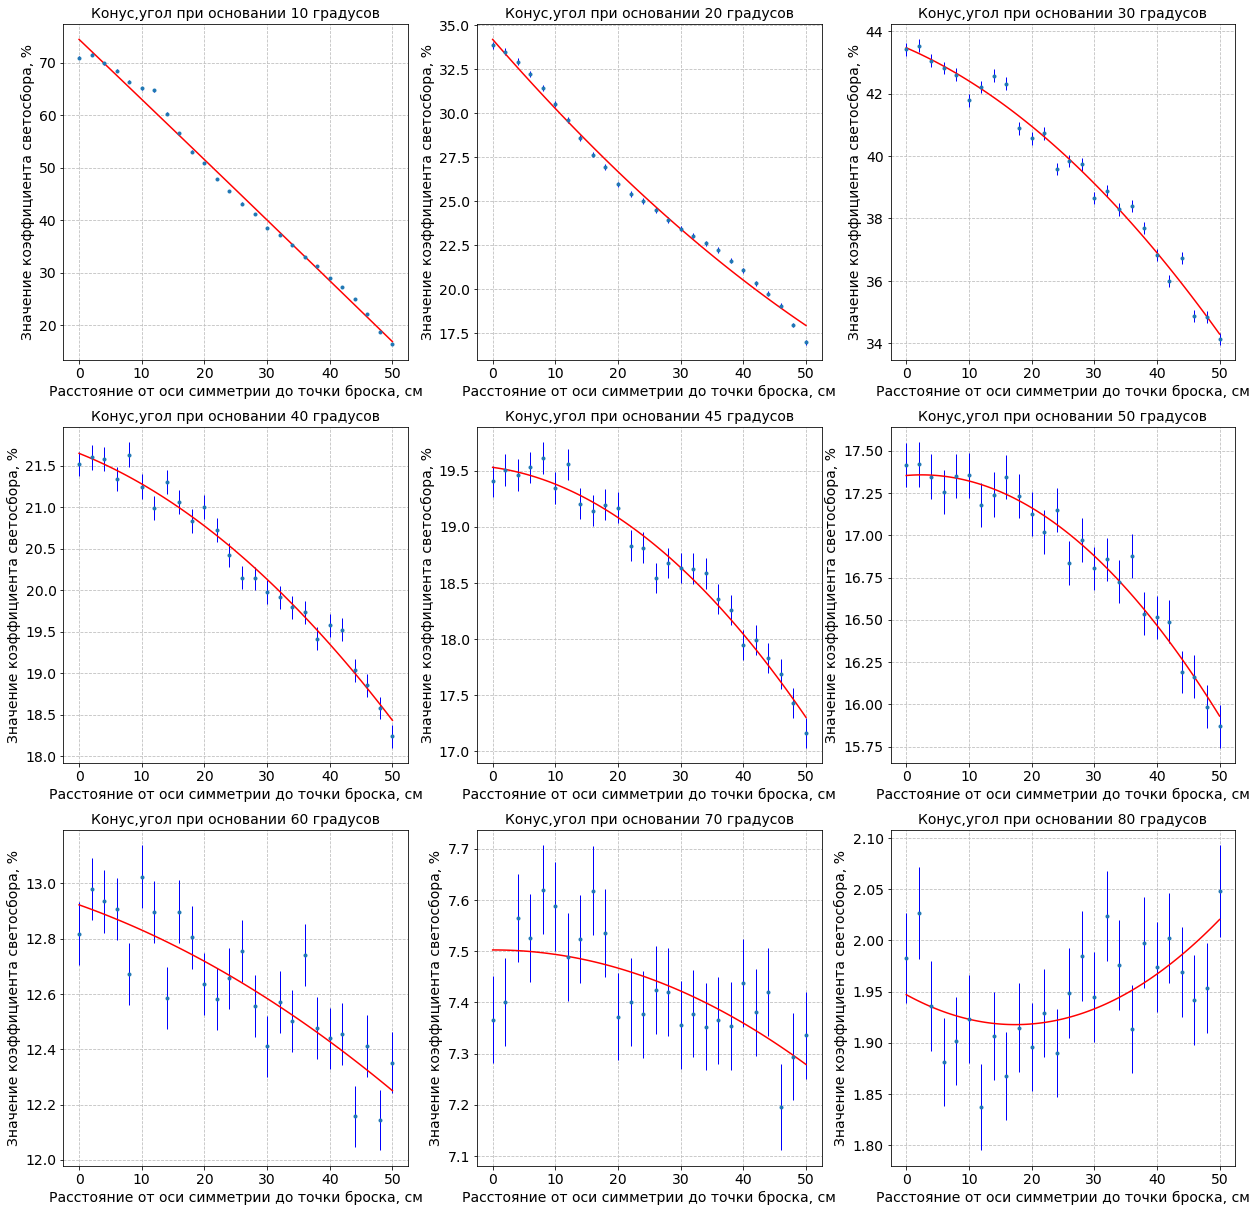

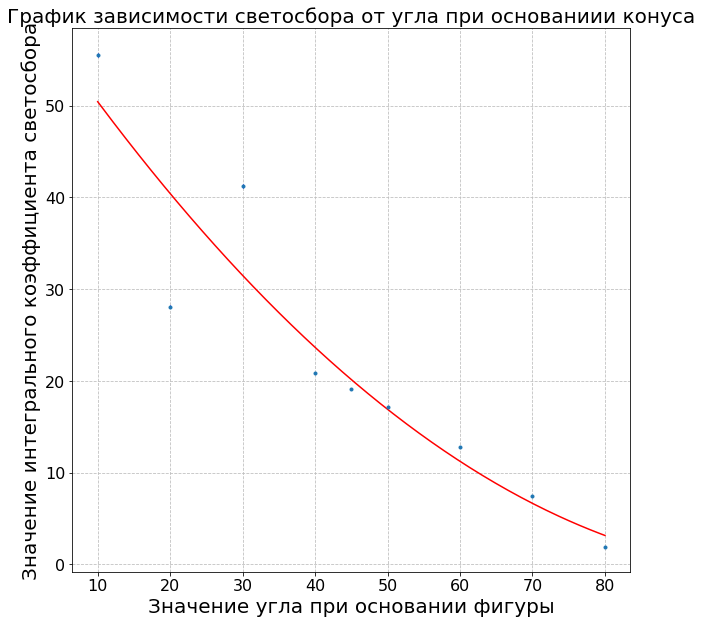

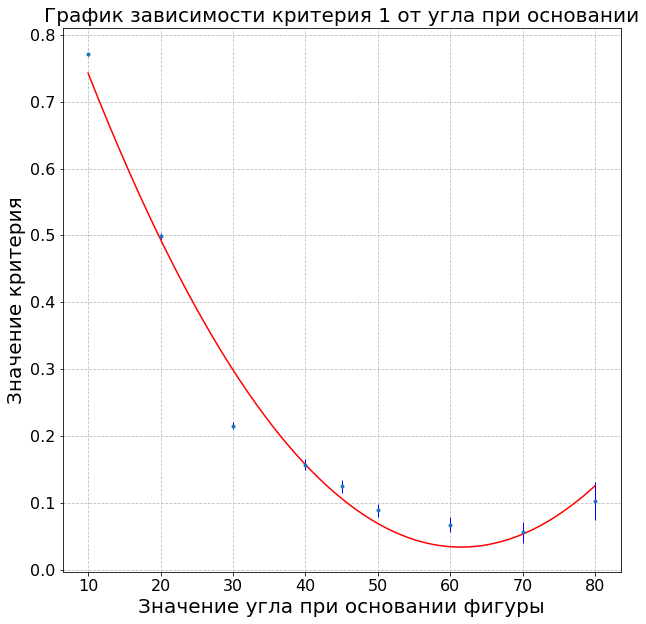

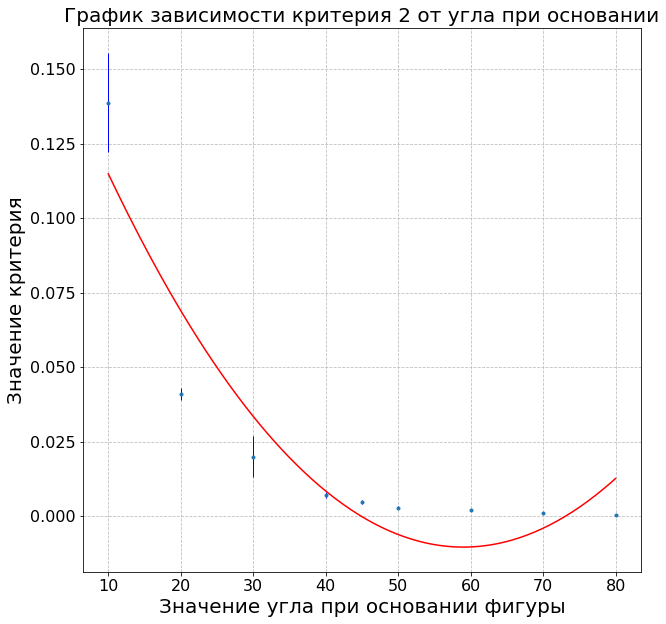

In [4]:
### Чтение данных. Запущено в каждой точке по 100000 фотонов
for i in range(9):           
    file_name=r"D:\figures\конус\deegres1\%d.txt"%(angle[i])
    file=open(file_name, 'r')
    print(file_name)
    for j in range (26):    
        line=file.readline()
        t=int(line)
        photon[j][i]=t
        
### Массив из значений ошибок для каждой точки бросания        
errph[:,:]=photon[:,:]**(1/2)

### Рассчет интегрального коэффициента светосбора с погрешностью для каждой фигуры
### Рассчет среднего числа собранных фотонов с погрешностью для каждой фигуры
light=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*photon[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
lighterr=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*errph[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
midpho=np.array([ float(light[i]*100) for i in range (9)])
midphoerr=np.array([ float(lighterr[i]*100) for i in range (9)])

### Рассчет знчения критерия 1 (ищется относительное значение разброса между максимально собранным числом фотонов
### и минимальным значением) c погрешностью
kr1=np.array([ float((photon[:,i].max()-photon[:,i].min())/photon[:,i].max()) for i in range (9)])
kr1err=np.array([float((1-kr1[i])*((errph[:,i].max()/photon[:,i].max())**2+
                                   (errph[:,i].min()/photon[:,i].min())**2)**(1/2)) for i in range (9)])

### Рассчет критерия 2 (оценка дисперсии для каждонго угла)  с погрешностью
kr2=np.array([ float((sum((light[i]/100-photon[:,i]/100000)**2*PI*
                          (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (9)])
kr2err=np.array([float(sum(2*((light[i]/100-photon[:,i]/100000)**2*
                               (lighterr[i]/100)**2 + (light[i]-photon[:,i]/100000)**2*(errph[:,i]/100000)**2)*PI*
                            (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))*(1/2) for i in range (9)])   
        
### Построение графиков зависимости зарегистрированных фотонов от расстояния до оси симметрии
plt.figure(figsize=(21, 21))
for i in range (9):
    #plt.figure(i, figsize=(10, 10))
    plt.subplot(3,3,i+1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.xlabel('Расстояние от оси симметрии до точки броска, см', size = '14')
    plt.ylabel('Значение коэффициента светосбора, %', size = '14')
    plt.title('Конус,угол при основании %d градусов' %(angle[i]), size = '14')
    hk=photon[:,i]/1000
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    print('-------------------------------------------------------------------')
    
    ### Рассчет коэффициента детерминации - оценки качества приближения
    z=np.polyfit(distance,hk,2)
    determination(distance,hk,z)
    
    ### Вывод остального нужного   
    print('Функция аппроксимирующей кривой y=%fx^2+%fx+%f' %(z[0], z[1], z[2]))
    print('Иттегральный коэффициент светосбора %f +/- %f' %(light[i], lighterr[i]))
    print('Среднее число собранных фотонов %f +/- %f ' %(midpho[i], midphoerr[i]))
    print('Значение критерия 1 - %f  +/- %f ' %(kr1[i], kr1err[i]))
    print('Значение критерия 2 - %f  +/- %f ' %(kr2[i], kr2err[i]))
    print('-------------------------------------------------------------------')
    dis1=np.linspace(0,50,num=100)
    plt.plot(dis1, z[0]*(dis1)**2+ z[1]*(dis1)+z[2], 'r', label='Fitted line')
    plt.errorbar(distance, hk, yerr=errph[:,i]/1000,fmt='.', ecolor='b', linewidth=1, label='Dots with errors')
    
### Построение графика для интегрального коэффициента светосбора    
plt.figure(10, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости светосбора от угла при основаниии конуса', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение интегрального коэффициента светосбора', size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z=np.polyfit(angle,light,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Интегральный светосбор')
determination(angle,light,z)
print('-------------------------------------------------------------------')  

###    
dis2=np.linspace(10,80,num=200)
plt.plot(dis2, z[0]*(dis2)**2+ z[1]*(dis2)+z[2], 'r')
plt.errorbar(angle, light, yerr=lighterr,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 1
plt.figure(11, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 1 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr1,2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий первый')
determination(angle,kr1,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr1, yerr=kr1err,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 2
plt.figure(12, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 2 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия',size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z1=np.polyfit(angle,kr2,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий второй')
determination(angle,kr2,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr2, yerr=kr2err,fmt='.', ecolor='b', linewidth=1)

## deegres2 -  в этой папке конусы от 10 до 80 градусов
## Отражение диффузное
## Отражение основания - 0.99, отражение стенок - 0.85
## Запускалось по 100000

D:\figures\конус\deegres2\10.txt
D:\figures\конус\deegres2\20.txt
D:\figures\конус\deegres2\30.txt
D:\figures\конус\deegres2\40.txt
D:\figures\конус\deegres2\45.txt
D:\figures\конус\deegres2\50.txt
D:\figures\конус\deegres2\60.txt
D:\figures\конус\deegres2\70.txt
D:\figures\конус\deegres2\80.txt
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.982353
Функция аппроксимирующей кривой y=0.024618x^2+-2.091249x+47.471337
Иттегральный коэффициент светосбора 22.931542 +/- 0.143116
Среднее число собранных фотонов 2293.154240 +/- 14.311600 
Значение критерия 1 - 0.962906  +/- 0.000897 
Значение критерия 2 - 0.140255  +/- 0.048281 
-------------------------------------------------------------------
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.994527
Функция аппроксимирующей кривой y=0.003503x^2+-0.512156x+22.394857
Иттегральный коэффициент светосбора 15.356448 +/- 0.121957
Сред

<ErrorbarContainer object of 3 artists>

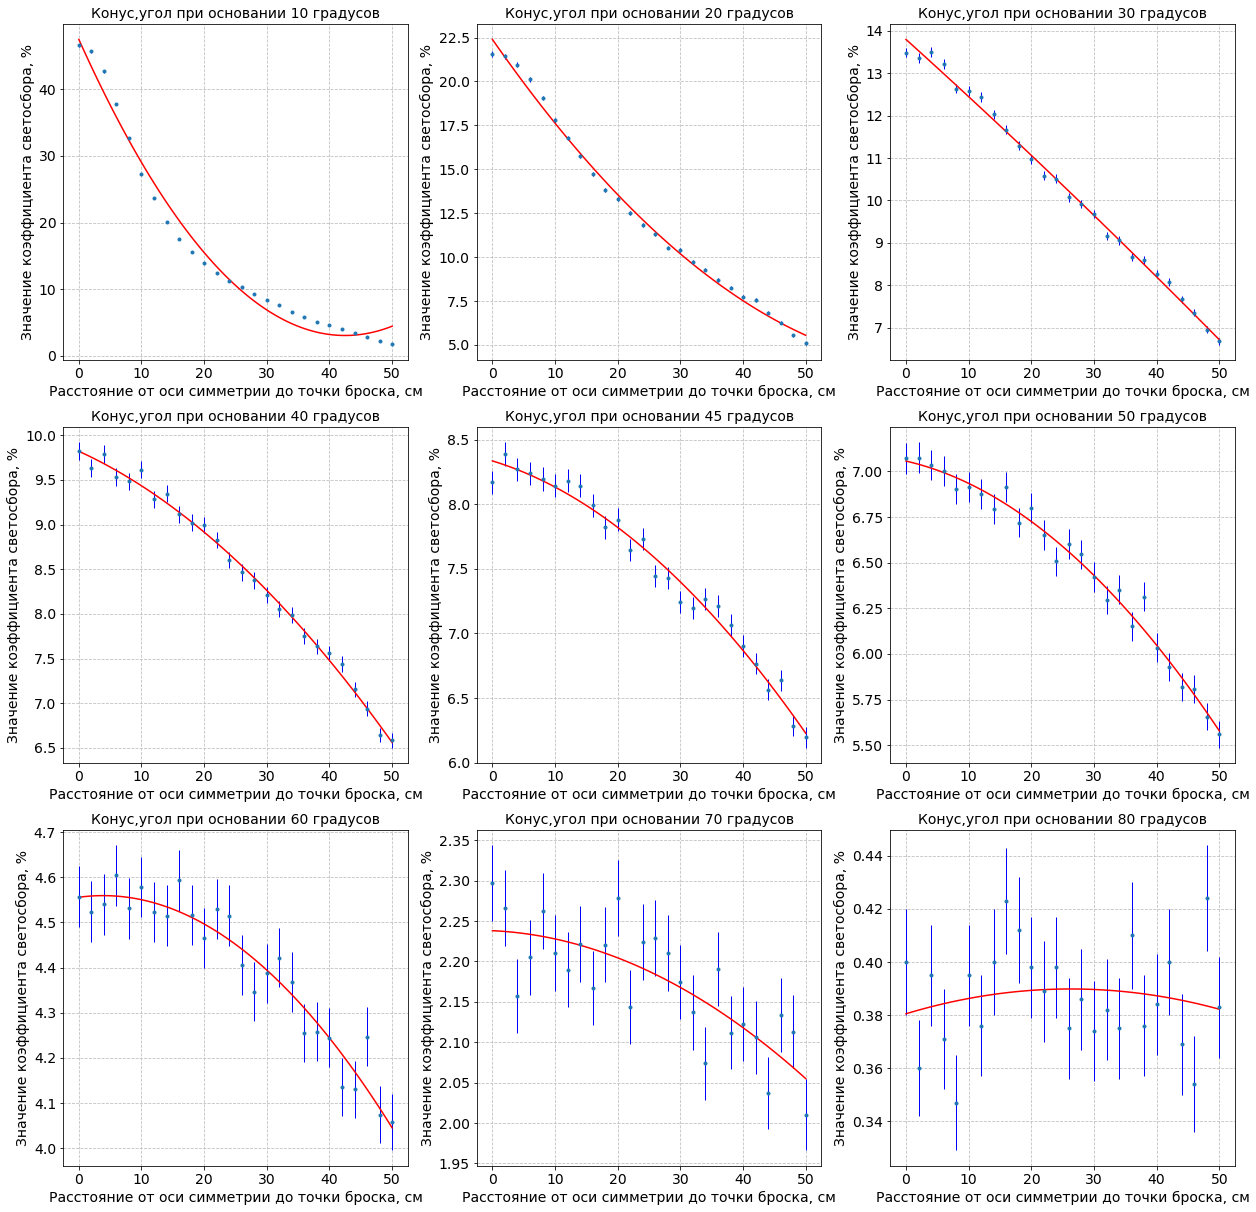

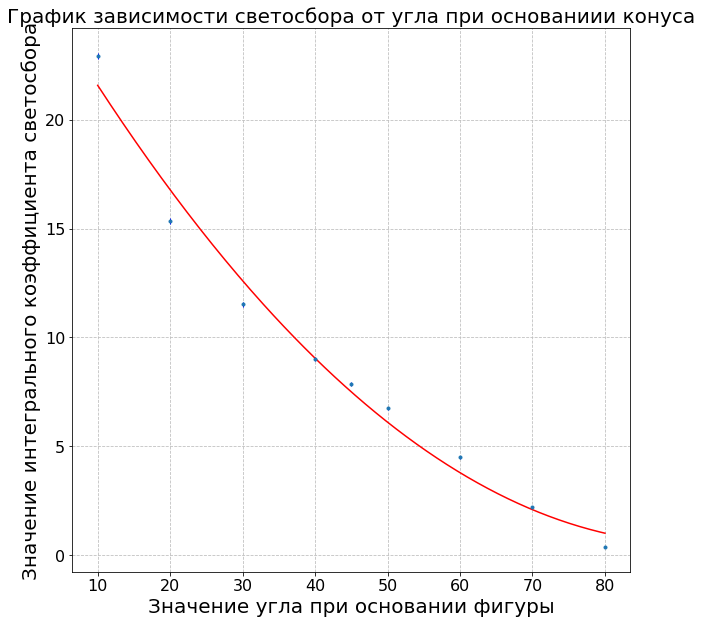

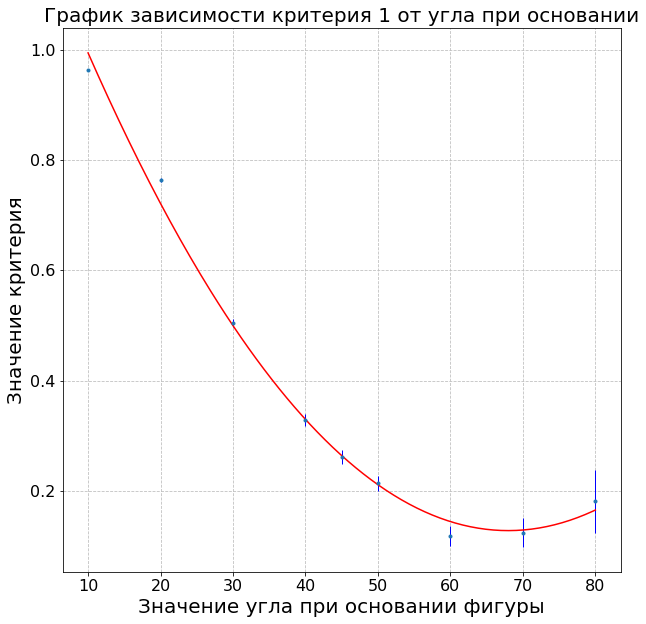

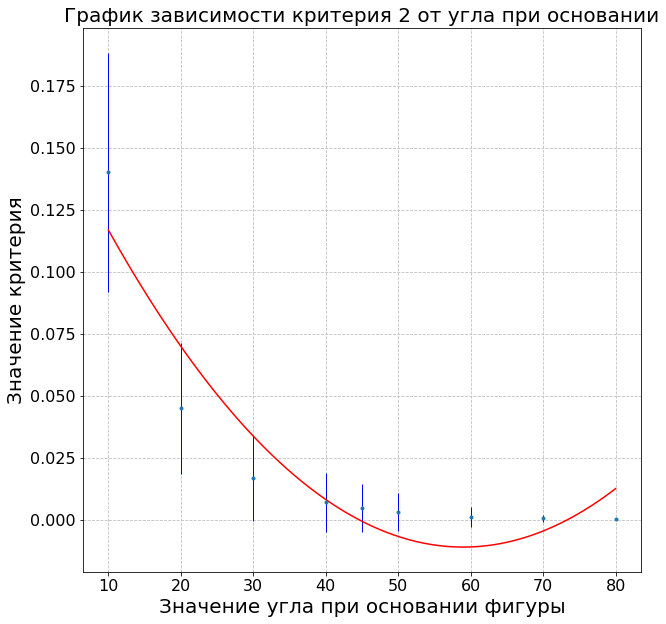

In [5]:
### Чтение данных. Запущено в каждой точке по 100000 фотонов
for i in range(9):           
    file_name=r"D:\figures\конус\deegres2\%d.txt"%(angle[i])
    file=open(file_name, 'r')
    print(file_name)
    for j in range (26):    
        line=file.readline()
        t=int(line)
        photon[j][i]=t
        
### Массив из значений ошибок для каждой точки бросания        
errph[:,:]=photon[:,:]**(1/2)

### Рассчет интегрального коэффициента светосбора с погрешностью для каждой фигуры
### Рассчет среднего числа собранных фотонов с погрешностью для каждой фигуры
light=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*photon[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
lighterr=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*errph[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
midpho=np.array([ float(light[i]*100) for i in range (9)])
midphoerr=np.array([ float(lighterr[i]*100) for i in range (9)])

### Рассчет знчения критерия 1 (ищется относительное значение разброса между максимально собранным числом фотонов
### и минимальным значением) c погрешностью
kr1=np.array([ float((photon[:,i].max()-photon[:,i].min())/photon[:,i].max()) for i in range (9)])
kr1err=np.array([float((1-kr1[i])*((errph[:,i].max()/photon[:,i].max())**2+
                                   (errph[:,i].min()/photon[:,i].min())**2)**(1/2)) for i in range (9)])

### Рассчет критерия 2 (оценка дисперсии для каждонго угла)  с погрешностью
kr2=np.array([ float((sum((light[i]/100-photon[:,i]/100000)**2*PI*
                          (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (9)])
kr2err=np.array([float((sum(2*((light[i]/100-photon[:,i]/100000)**2*
                               (lighterr[i]/100)**2 + (light[i]-photon[:,i]/100000)**2*(errph[:,i]/100000)**2)*PI*
                            (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (9)])  
        
### Построение графиков зависимости зарегистрированных фотонов от расстояния до оси симметрии
plt.figure(figsize=(21, 21))
for i in range (9):
    #plt.figure(i, figsize=(10, 10))
    plt.subplot(3,3,i+1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.xlabel('Расстояние от оси симметрии до точки броска, см', size = '14')
    plt.ylabel('Значение коэффициента светосбора, %', size = '14')
    plt.title('Конус,угол при основании %d градусов' %(angle[i]), size = '14')
    hk=photon[:,i]/1000
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    print('-------------------------------------------------------------------')
    
    ### Рассчет коэффициента детерминации - оценки качества приближения
    z=np.polyfit(distance,hk,2)
    determination(distance,hk,z)
    
    ### Вывод остального нужного   
    print('Функция аппроксимирующей кривой y=%fx^2+%fx+%f' %(z[0], z[1], z[2]))
    print('Иттегральный коэффициент светосбора %f +/- %f' %(light[i], lighterr[i]))
    print('Среднее число собранных фотонов %f +/- %f ' %(midpho[i], midphoerr[i]))
    print('Значение критерия 1 - %f  +/- %f ' %(kr1[i], kr1err[i]))
    print('Значение критерия 2 - %f  +/- %f ' %(kr2[i], kr2err[i]))
    print('-------------------------------------------------------------------')
    dis1=np.linspace(0,50,num=100)
    plt.plot(dis1, z[0]*(dis1)**2+ z[1]*(dis1)+z[2], 'r', label='Fitted line')
    plt.errorbar(distance, hk, yerr=errph[:,i]/1000,fmt='.', ecolor='b', linewidth=1, label='Dots with errors')
    
### Построение графика для интегрального коэффициента светосбора    
plt.figure(10, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости светосбора от угла при основаниии конуса', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение интегрального коэффициента светосбора', size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z=np.polyfit(angle,light,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Интегральный светосбор')
determination(angle,light,z)
print('-------------------------------------------------------------------')  

###    
dis2=np.linspace(10,80,num=200)
plt.plot(dis2, z[0]*(dis2)**2+ z[1]*(dis2)+z[2], 'r')
plt.errorbar(angle, light, yerr=lighterr,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 1
plt.figure(11, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 1 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr1,2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий первый')
determination(angle,kr1,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr1, yerr=kr1err,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 2
plt.figure(12, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 2 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия',size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z1=np.polyfit(angle,kr2,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий второй')
determination(angle,kr2,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr2, yerr=kr2err,fmt='.', ecolor='b', linewidth=1)

## deegres5 -  в этой папке конусы от 10 до 80 градусов
## Отражение зеркальное
## Отражение основания - 0.99, отражение стенок - 0.95
## Запускалось по 100000

D:\figures\конус\deegres5\10.txt
D:\figures\конус\deegres5\20.txt
D:\figures\конус\deegres5\30.txt
D:\figures\конус\deegres5\40.txt
D:\figures\конус\deegres5\45.txt
D:\figures\конус\deegres5\50.txt
D:\figures\конус\deegres5\60.txt
D:\figures\конус\deegres5\70.txt
D:\figures\конус\deegres5\80.txt
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.971883
Функция аппроксимирующей кривой y=0.038230x^2+-2.991104x+61.373366
Иттегральный коэффициент светосбора 27.569415 +/- 0.154714
Среднее число собранных фотонов 2756.941520 +/- 15.471400 
Значение критерия 1 - 0.946865  +/- 0.000971 
Значение критерия 2 - 0.190557  +/- 0.063566 
-------------------------------------------------------------------
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.953586
Функция аппроксимирующей кривой y=0.042602x^2+-3.128158x+62.022780
Иттегральный коэффициент светосбора 27.556648 +/- 0.155742
Сред

<ErrorbarContainer object of 3 artists>

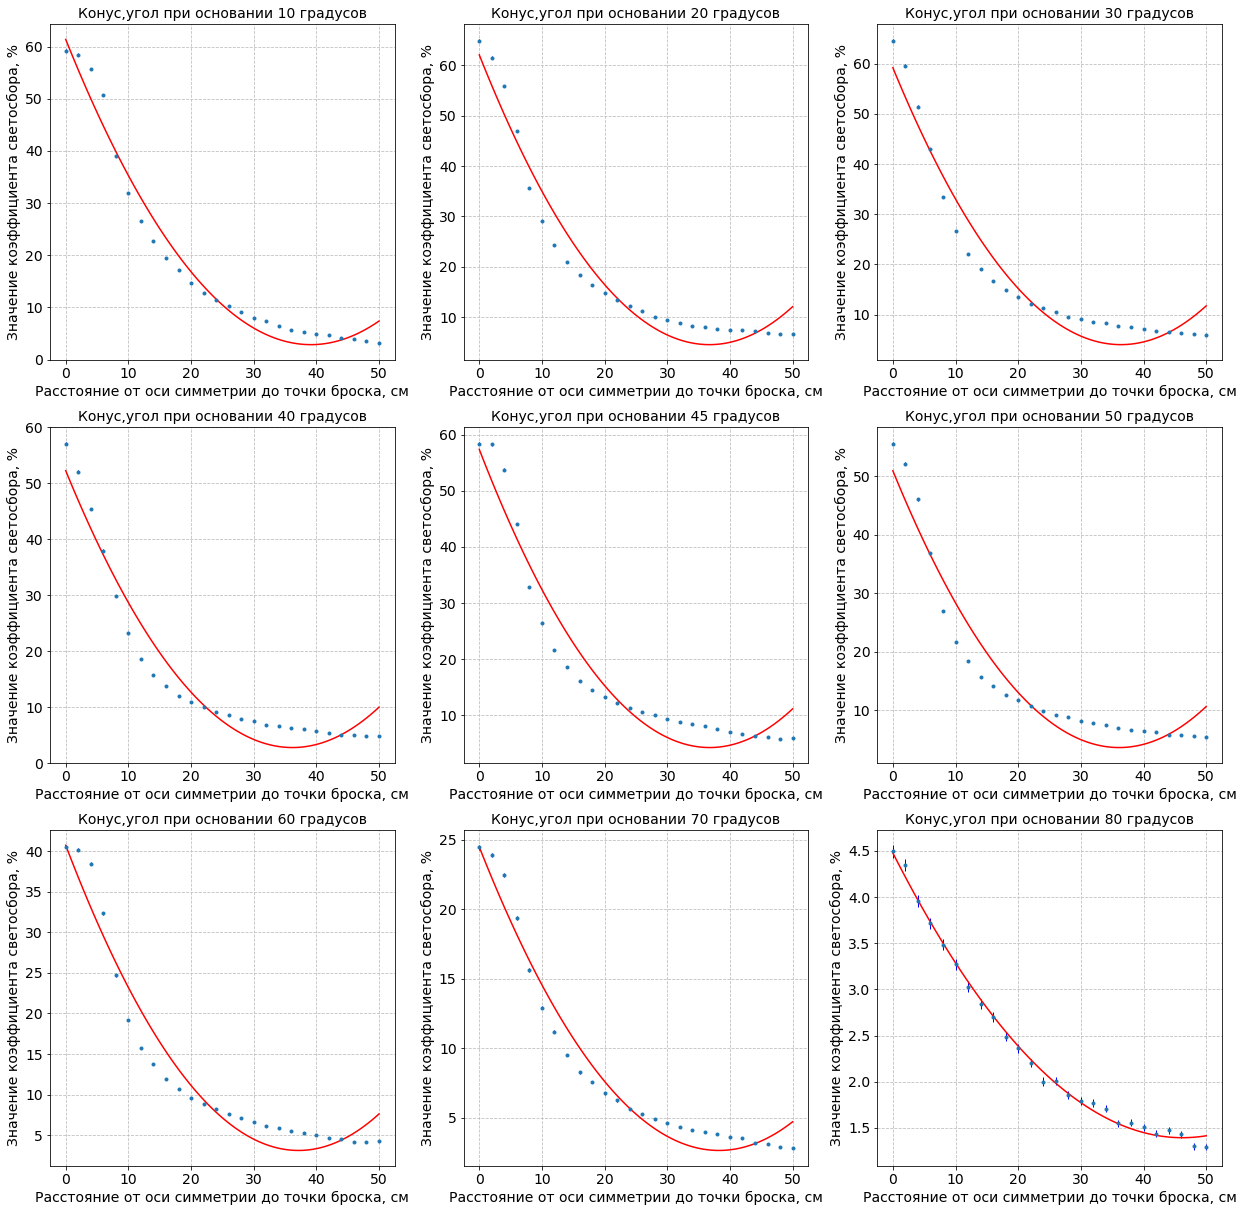

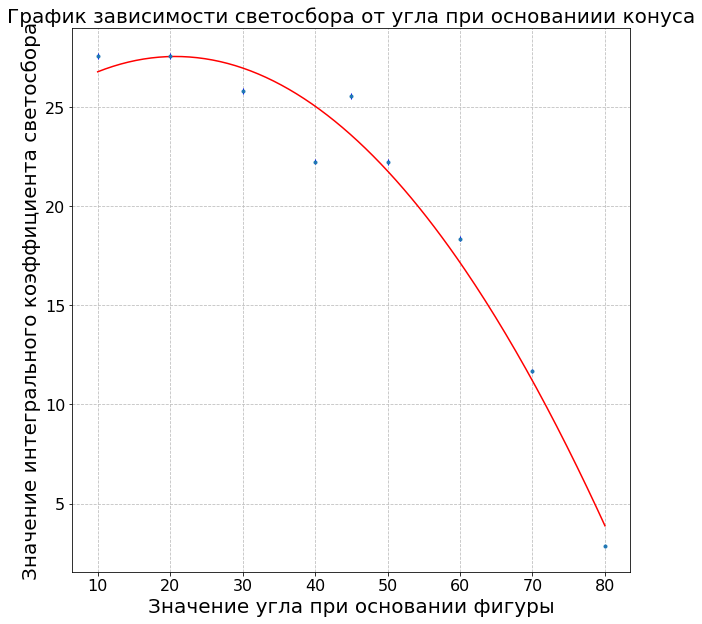

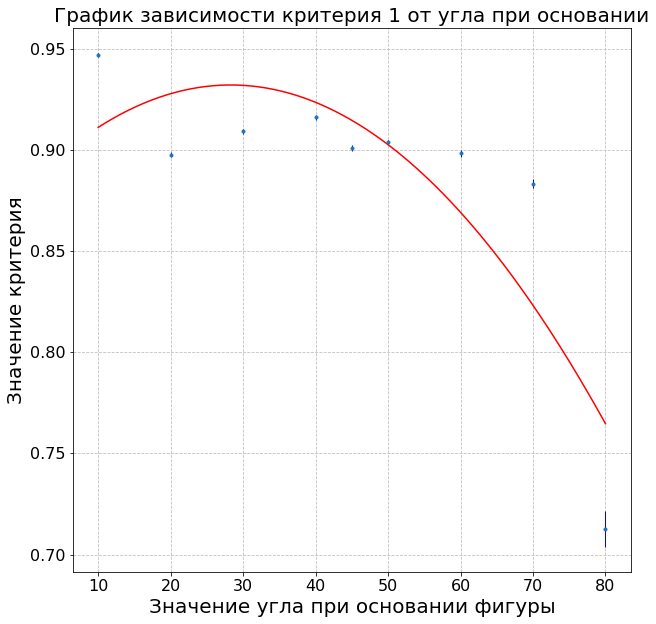

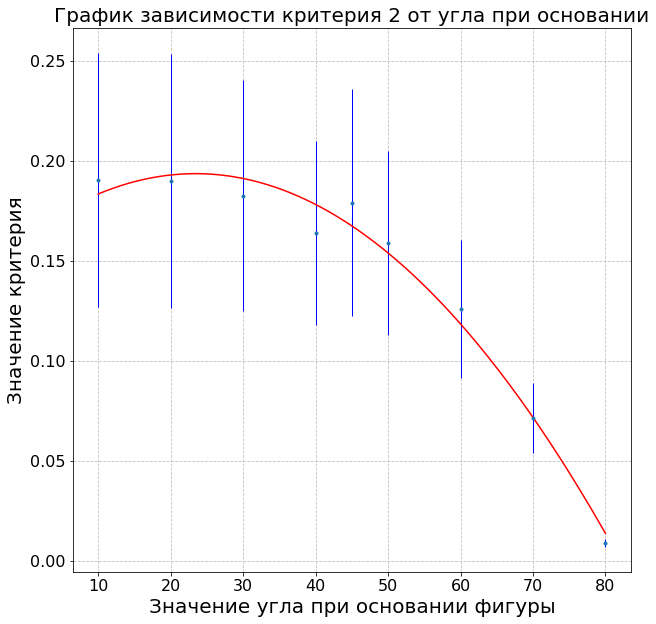

In [8]:
### Чтение данных. Запущено в каждой точке по 100000 фотонов
for i in range(9):           
    file_name=r"D:\figures\конус\deegres5\%d.txt"%(angle[i])
    file=open(file_name, 'r')
    print(file_name)
    for j in range (26):    
        line=file.readline()
        t=int(line)
        photon[j][i]=t
        
### Массив из значений ошибок для каждой точки бросания        
errph[:,:]=photon[:,:]**(1/2)

### Рассчет интегрального коэффициента светосбора с погрешностью для каждой фигуры
### Рассчет среднего числа собранных фотонов с погрешностью для каждой фигуры
light=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*photon[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
lighterr=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*errph[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
midpho=np.array([ float(light[i]*100) for i in range (9)])
midphoerr=np.array([ float(lighterr[i]*100) for i in range (9)])

### Рассчет знчения критерия 1 (ищется относительное значение разброса между максимально собранным числом фотонов
### и минимальным значением) c погрешностью
kr1=np.array([ float((photon[:,i].max()-photon[:,i].min())/photon[:,i].max()) for i in range (9)])
kr1err=np.array([float((1-kr1[i])*((errph[:,i].max()/photon[:,i].max())**2+
                                   (errph[:,i].min()/photon[:,i].min())**2)**(1/2)) for i in range (9)])

### Рассчет критерия 2 (оценка дисперсии для каждонго угла)  с погрешностью
kr2=np.array([ float((sum((light[i]/100-photon[:,i]/100000)**2*PI*
                          (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (9)])
kr2err=np.array([float((sum(2*((light[i]/100-photon[:,i]/100000)**2*
                               (lighterr[i]/100)**2 + (light[i]-photon[:,i]/100000)**2*(errph[:,i]/100000)**2)*PI*
                            (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (9)])  
        
### Построение графиков зависимости зарегистрированных фотонов от расстояния до оси симметрии
plt.figure(figsize=(21, 21))
for i in range (9):
    #plt.figure(i, figsize=(10, 10))
    plt.subplot(3,3,i+1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.xlabel('Расстояние от оси симметрии до точки броска, см', size = '14')
    plt.ylabel('Значение коэффициента светосбора, %', size = '14')
    plt.title('Конус,угол при основании %d градусов' %(angle[i]), size = '14')
    hk=photon[:,i]/1000
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    print('-------------------------------------------------------------------')
    
    ### Рассчет коэффициента детерминации - оценки качества приближения
    z=np.polyfit(distance,hk,2)
    determination(distance,hk,z)
    
    ### Вывод остального нужного   
    print('Функция аппроксимирующей кривой y=%fx^2+%fx+%f' %(z[0], z[1], z[2]))
    print('Иттегральный коэффициент светосбора %f +/- %f' %(light[i], lighterr[i]))
    print('Среднее число собранных фотонов %f +/- %f ' %(midpho[i], midphoerr[i]))
    print('Значение критерия 1 - %f  +/- %f ' %(kr1[i], kr1err[i]))
    print('Значение критерия 2 - %f  +/- %f ' %(kr2[i], kr2err[i]))
    print('-------------------------------------------------------------------')
    dis1=np.linspace(0,50,num=100)
    plt.plot(dis1, z[0]*(dis1)**2+ z[1]*(dis1)+z[2], 'r', label='Fitted line')
    plt.errorbar(distance, hk, yerr=errph[:,i]/1000,fmt='.', ecolor='b', linewidth=1, label='Dots with errors')
    
### Построение графика для интегрального коэффициента светосбора    
plt.figure(10, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости светосбора от угла при основаниии конуса', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение интегрального коэффициента светосбора', size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z=np.polyfit(angle,light,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Интегральный светосбор')
determination(angle,light,z)
print('-------------------------------------------------------------------')  

###    
dis2=np.linspace(10,80,num=200)
plt.plot(dis2, z[0]*(dis2)**2+ z[1]*(dis2)+z[2], 'r')
plt.errorbar(angle, light, yerr=lighterr,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 1
plt.figure(11, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 1 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr1,2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий первый')
determination(angle,kr1,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr1, yerr=kr1err,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 2
plt.figure(12, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 2 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия',size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z1=np.polyfit(angle,kr2,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий второй')
determination(angle,kr2,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr2, yerr=kr2err,fmt='.', ecolor='b', linewidth=1)

## deegres6 -  в этой папке конусы от 10 до 80 градусов
## Отражение зеркальное
## Отражение основания - 0.99, отражение стенок - 0.85
## Запускалось по 100000

D:\figures\конус\deegres6\10.txt
D:\figures\конус\deegres6\20.txt
D:\figures\конус\deegres6\30.txt
D:\figures\конус\deegres6\40.txt
D:\figures\конус\deegres6\45.txt
D:\figures\конус\deegres6\50.txt
D:\figures\конус\deegres6\60.txt
D:\figures\конус\deegres6\70.txt
D:\figures\конус\deegres6\80.txt
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.974658
Функция аппроксимирующей кривой y=0.029007x^2+-2.245690x+44.130492
Иттегральный коэффициент светосбора 18.901414 +/- 0.125895
Среднее число собранных фотонов 1890.141360 +/- 12.589520 
Значение критерия 1 - 0.964716  +/- 0.000923 
Значение критерия 2 - 0.141588  +/- 0.036045 
-------------------------------------------------------------------
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.946584
Функция аппроксимирующей кривой y=0.029335x^2+-2.137610x+40.887083
Иттегральный коэффициент светосбора 17.401158 +/- 0.122670
Сред

<ErrorbarContainer object of 3 artists>

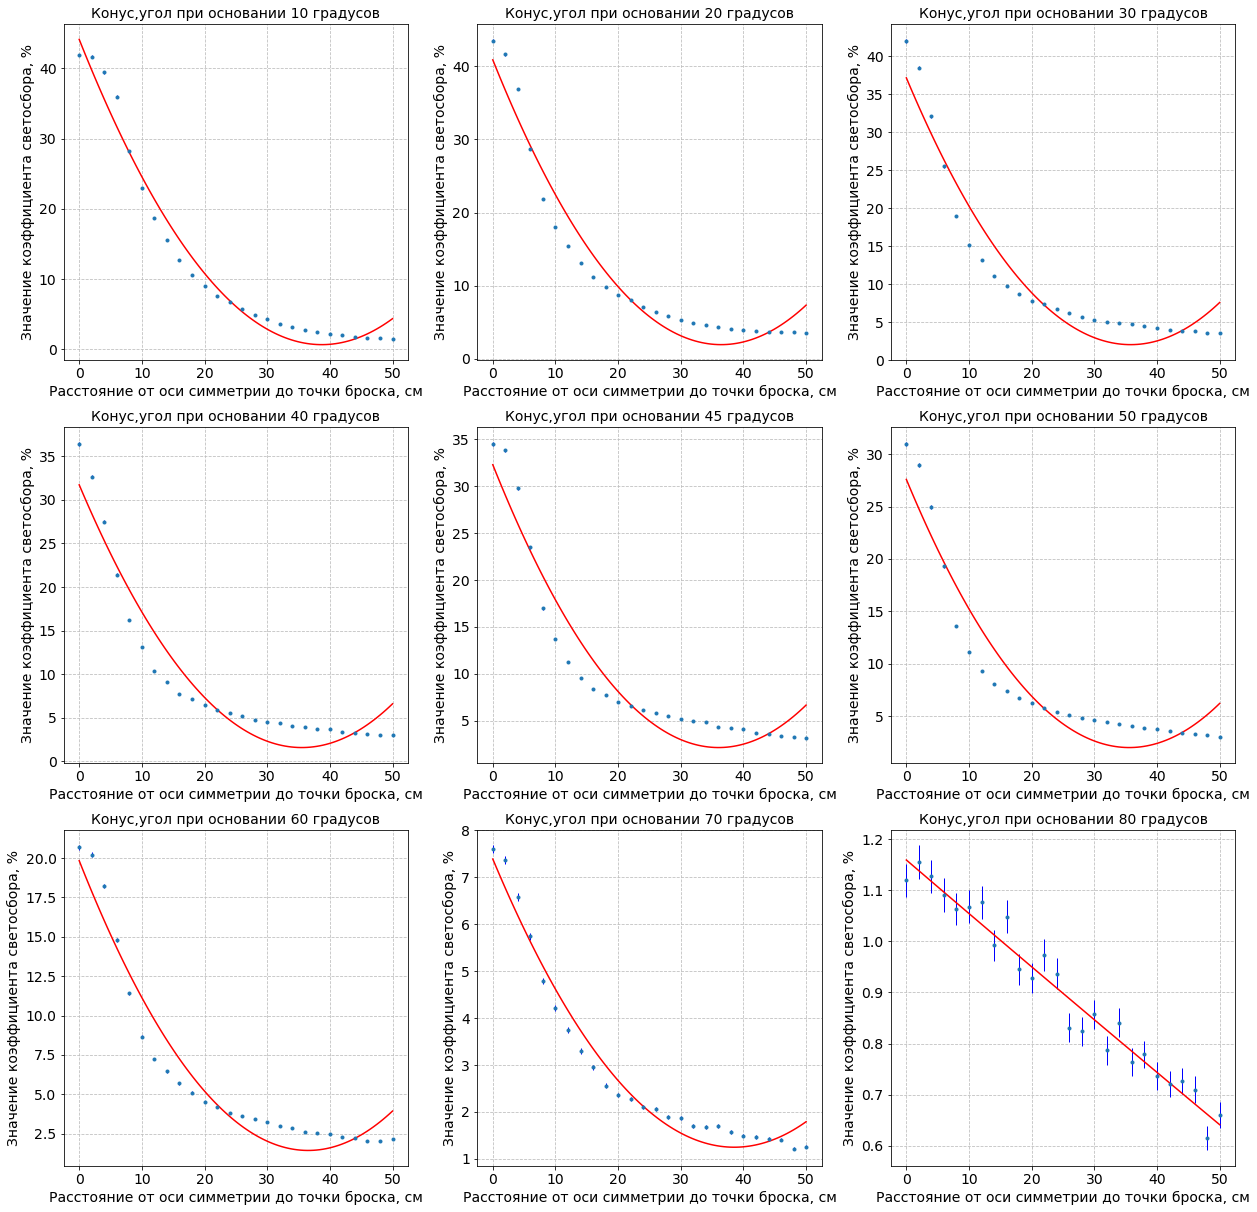

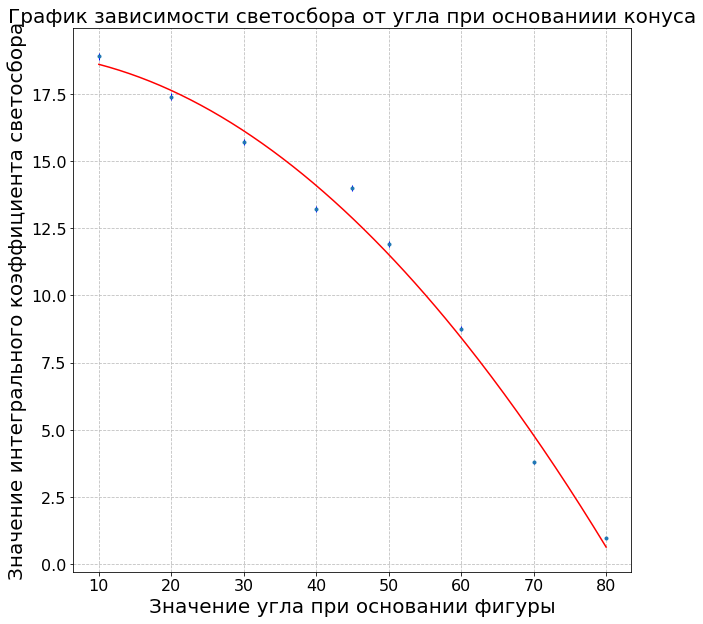

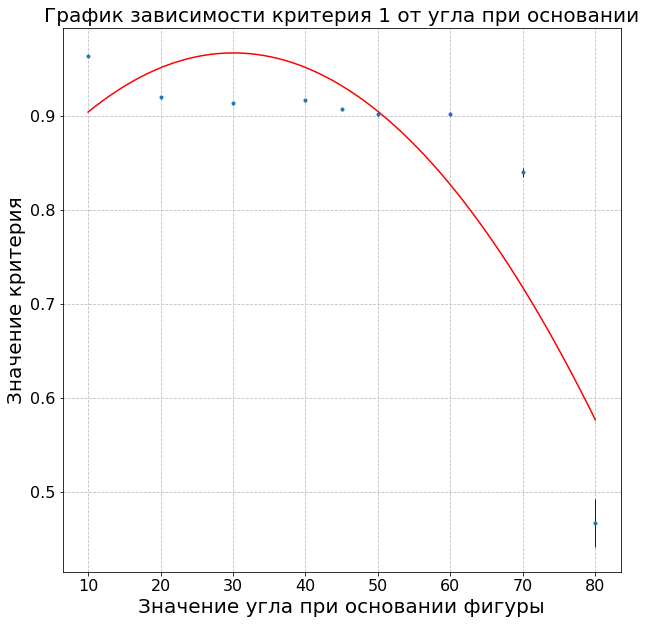

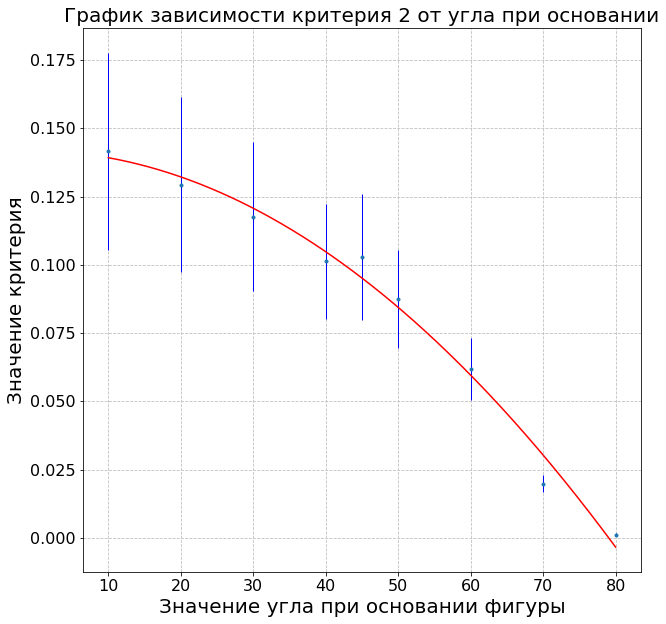

In [9]:
### Чтение данных. Запущено в каждой точке по 100000 фотонов
for i in range(9):           
    file_name=r"D:\figures\конус\deegres6\%d.txt"%(angle[i])
    file=open(file_name, 'r')
    print(file_name)
    for j in range (26):    
        line=file.readline()
        t=int(line)
        photon[j][i]=t
        
### Массив из значений ошибок для каждой точки бросания        
errph[:,:]=photon[:,:]**(1/2)

### Рассчет интегрального коэффициента светосбора с погрешностью для каждой фигуры
### Рассчет среднего числа собранных фотонов с погрешностью для каждой фигуры
light=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*photon[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
lighterr=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*errph[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
midpho=np.array([ float(light[i]*100) for i in range (9)])
midphoerr=np.array([ float(lighterr[i]*100) for i in range (9)])

### Рассчет знчения критерия 1 (ищется относительное значение разброса между максимально собранным числом фотонов
### и минимальным значением) c погрешностью
kr1=np.array([ float((photon[:,i].max()-photon[:,i].min())/photon[:,i].max()) for i in range (9)])
kr1err=np.array([float((1-kr1[i])*((errph[:,i].max()/photon[:,i].max())**2+
                                   (errph[:,i].min()/photon[:,i].min())**2)**(1/2)) for i in range (9)])

### Рассчет критерия 2 (оценка дисперсии для каждонго угла)  с погрешностью
kr2=np.array([ float((sum((light[i]/100-photon[:,i]/100000)**2*PI*
                          (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (9)])
kr2err=np.array([float((sum(2*((light[i]/100-photon[:,i]/100000)**2*
                               (lighterr[i]/100)**2 + (light[i]-photon[:,i]/100000)**2*(errph[:,i]/100000)**2)*PI*
                            (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (9)])  
### Построение графиков зависимости зарегистрированных фотонов от расстояния до оси симметрии
plt.figure(figsize=(21, 21))
for i in range (9):
    #plt.figure(i, figsize=(10, 10))
    plt.subplot(3,3,i+1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.xlabel('Расстояние от оси симметрии до точки броска, см', size = '14')
    plt.ylabel('Значение коэффициента светосбора, %', size = '14')
    plt.title('Конус,угол при основании %d градусов' %(angle[i]), size = '14')
    hk=photon[:,i]/1000
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    print('-------------------------------------------------------------------')
    
    ### Рассчет коэффициента детерминации - оценки качества приближения
    z=np.polyfit(distance,hk,2)
    determination(distance,hk,z)
    
    ### Вывод остального нужного   
    print('Функция аппроксимирующей кривой y=%fx^2+%fx+%f' %(z[0], z[1], z[2]))
    print('Иттегральный коэффициент светосбора %f +/- %f' %(light[i], lighterr[i]))
    print('Среднее число собранных фотонов %f +/- %f ' %(midpho[i], midphoerr[i]))
    print('Значение критерия 1 - %f  +/- %f ' %(kr1[i], kr1err[i]))
    print('Значение критерия 2 - %f  +/- %f ' %(kr2[i], kr2err[i]))
    print('-------------------------------------------------------------------')
    dis1=np.linspace(0,50,num=100)
    plt.plot(dis1, z[0]*(dis1)**2+ z[1]*(dis1)+z[2], 'r', label='Fitted line')
    plt.errorbar(distance, hk, yerr=errph[:,i]/1000,fmt='.', ecolor='b', linewidth=1, label='Dots with errors')
    
### Построение графика для интегрального коэффициента светосбора    
plt.figure(10, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости светосбора от угла при основаниии конуса', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение интегрального коэффициента светосбора', size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z=np.polyfit(angle,light,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Интегральный светосбор')
determination(angle,light,z)
print('-------------------------------------------------------------------')  

###    
dis2=np.linspace(10,80,num=200)
plt.plot(dis2, z[0]*(dis2)**2+ z[1]*(dis2)+z[2], 'r')
plt.errorbar(angle, light, yerr=lighterr,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 1
plt.figure(11, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 1 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr1,2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий первый')
determination(angle,kr1,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr1, yerr=kr1err,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 2
plt.figure(12, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 2 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия',size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z1=np.polyfit(angle,kr2,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий второй')
determination(angle,kr2,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr2, yerr=kr2err,fmt='.', ecolor='b', linewidth=1)

## deegres7 -  в этой папке конусы от 10 до 80 градусов
## Отражение смешанное
## Отражение основания - 0.99, отражение стенок - 0.95
## Запускалось по 100000

D:\figures\конус\deegres7\10.txt
D:\figures\конус\deegres7\20.txt
D:\figures\конус\deegres7\30.txt
D:\figures\конус\deegres7\40.txt
D:\figures\конус\deegres7\45.txt
D:\figures\конус\deegres7\50.txt
D:\figures\конус\deegres7\60.txt
D:\figures\конус\deegres7\70.txt
D:\figures\конус\deegres7\80.txt
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.985974
Функция аппроксимирующей кривой y=0.014202x^2+-1.522387x+52.355746
Иттегральный коэффициент светосбора 32.941576 +/- 0.178032
Среднее число собранных фотонов 3294.157560 +/- 17.803240 
Значение критерия 1 - 0.821463  +/- 0.002017 
Значение критерия 2 - 0.117586  +/- 0.083402 
-------------------------------------------------------------------
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.992637
Функция аппроксимирующей кривой y=0.002678x^2+-0.488392x+35.513452
Иттегральный коэффициент светосбора 28.531672 +/- 0.167842
Сред

<ErrorbarContainer object of 3 artists>

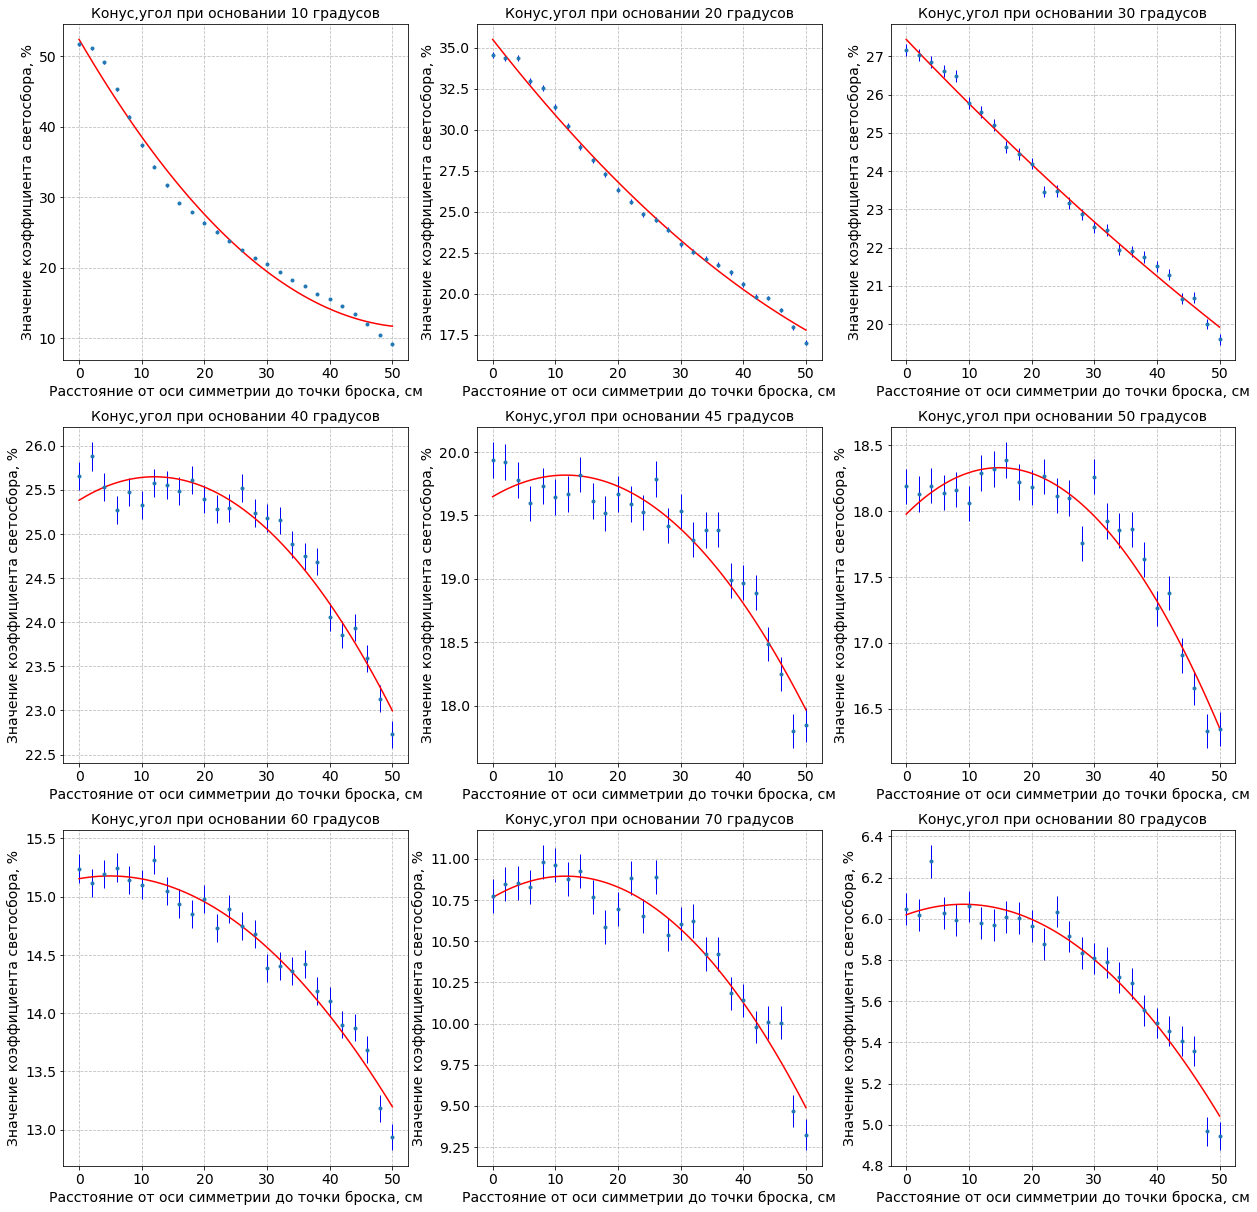

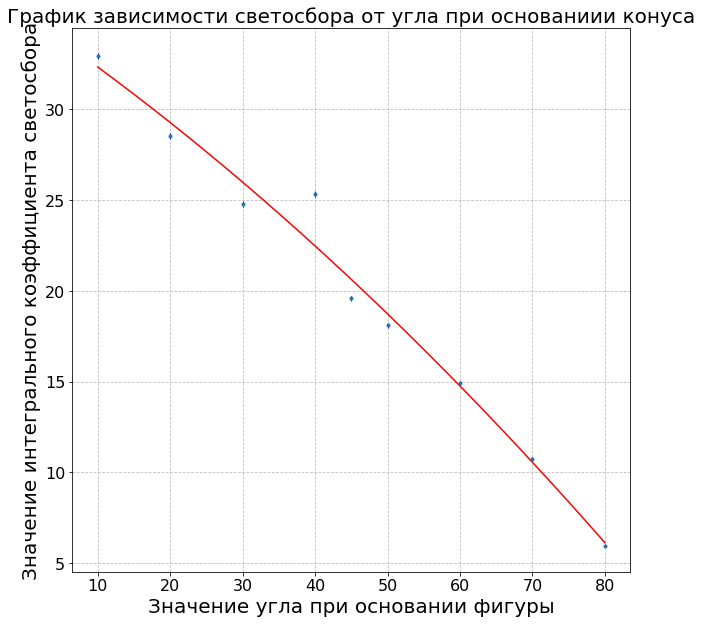

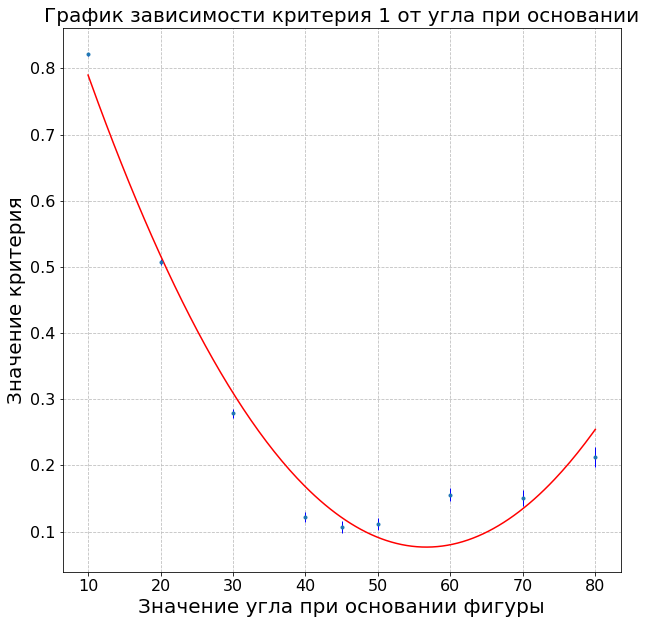

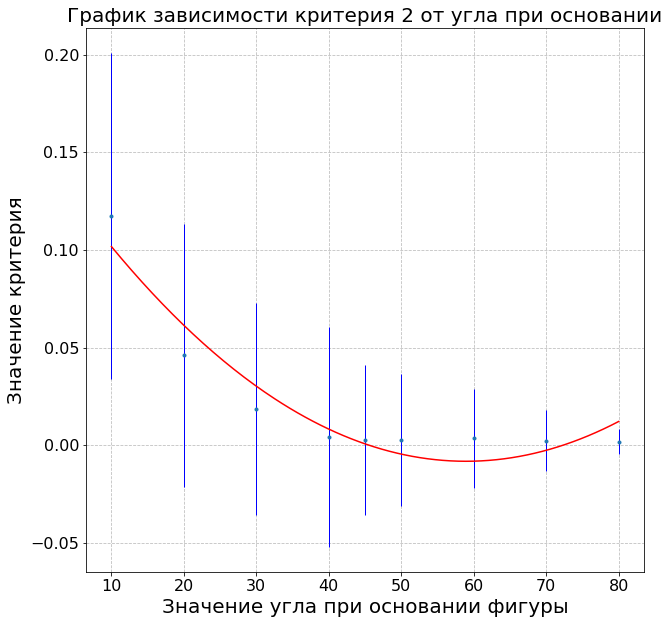

In [10]:
### Чтение данных. Запущено в каждой точке по 100000 фотонов
for i in range(9):           
    file_name=r"D:\figures\конус\deegres7\%d.txt"%(angle[i])
    file=open(file_name, 'r')
    print(file_name)
    for j in range (26):    
        line=file.readline()
        t=int(line)
        photon[j][i]=t
        
### Массив из значений ошибок для каждой точки бросания        
errph[:,:]=photon[:,:]**(1/2)

### Рассчет интегрального коэффициента светосбора с погрешностью для каждой фигуры
### Рассчет среднего числа собранных фотонов с погрешностью для каждой фигуры
light=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*photon[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
lighterr=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*errph[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
midpho=np.array([ float(light[i]*100) for i in range (9)])
midphoerr=np.array([ float(lighterr[i]*100) for i in range (9)])

### Рассчет знчения критерия 1 (ищется относительное значение разброса между максимально собранным числом фотонов
### и минимальным значением) c погрешностью
kr1=np.array([ float((photon[:,i].max()-photon[:,i].min())/photon[:,i].max()) for i in range (9)])
kr1err=np.array([float((1-kr1[i])*((errph[:,i].max()/photon[:,i].max())**2+
                                   (errph[:,i].min()/photon[:,i].min())**2)**(1/2)) for i in range (9)])

### Рассчет критерия 2 (оценка дисперсии для каждонго угла)  с погрешностью
kr2=np.array([ float((sum((light[i]/100-photon[:,i]/100000)**2*PI*
                          (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (9)])
kr2err=np.array([float((sum(2*((light[i]/100-photon[:,i]/100000)**2*
                               (lighterr[i]/100)**2 + (light[i]-photon[:,i]/100000)**2*(errph[:,i]/100000)**2)*PI*
                            (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (9)])  
        
### Построение графиков зависимости зарегистрированных фотонов от расстояния до оси симметрии
plt.figure(figsize=(21, 21))
for i in range (9):
    #plt.figure(i, figsize=(10, 10))
    plt.subplot(3,3,i+1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.xlabel('Расстояние от оси симметрии до точки броска, см', size = '14')
    plt.ylabel('Значение коэффициента светосбора, %', size = '14')
    plt.title('Конус,угол при основании %d градусов' %(angle[i]), size = '14')
    hk=photon[:,i]/1000
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    print('-------------------------------------------------------------------')
    
    ### Рассчет коэффициента детерминации - оценки качества приближения
    z=np.polyfit(distance,hk,2)
    determination(distance,hk,z)
    
    ### Вывод остального нужного   
    print('Функция аппроксимирующей кривой y=%fx^2+%fx+%f' %(z[0], z[1], z[2]))
    print('Иттегральный коэффициент светосбора %f +/- %f' %(light[i], lighterr[i]))
    print('Среднее число собранных фотонов %f +/- %f ' %(midpho[i], midphoerr[i]))
    print('Значение критерия 1 - %f  +/- %f ' %(kr1[i], kr1err[i]))
    print('Значение критерия 2 - %f  +/- %f ' %(kr2[i], kr2err[i]))
    print('-------------------------------------------------------------------')
    dis1=np.linspace(0,50,num=100)
    plt.plot(dis1, z[0]*(dis1)**2+ z[1]*(dis1)+z[2], 'r', label='Fitted line')
    plt.errorbar(distance, hk, yerr=errph[:,i]/1000,fmt='.', ecolor='b', linewidth=1, label='Dots with errors')
    
### Построение графика для интегрального коэффициента светосбора    
plt.figure(10, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости светосбора от угла при основаниии конуса', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение интегрального коэффициента светосбора', size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z=np.polyfit(angle,light,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Интегральный светосбор')
determination(angle,light,z)
print('-------------------------------------------------------------------')  

###    
dis2=np.linspace(10,80,num=200)
plt.plot(dis2, z[0]*(dis2)**2+ z[1]*(dis2)+z[2], 'r')
plt.errorbar(angle, light, yerr=lighterr,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 1
plt.figure(11, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 1 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr1,2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий первый')
determination(angle,kr1,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr1, yerr=kr1err,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 2
plt.figure(12, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 2 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия',size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z1=np.polyfit(angle,kr2,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий второй')
determination(angle,kr2,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr2, yerr=kr2err,fmt='.', ecolor='b', linewidth=1)

## deegres8 -  в этой папке конусы от 10 до 80 градусов
## Отражение смешнное
## Отражение основания - 0.99, отражение стенок - 0.85
## Запускалось по 100000

D:\figures\конус\deegres8\10.txt
D:\figures\конус\deegres8\20.txt
D:\figures\конус\deegres8\30.txt
D:\figures\конус\deegres8\40.txt
D:\figures\конус\deegres8\45.txt
D:\figures\конус\deegres8\50.txt
D:\figures\конус\deegres8\60.txt
D:\figures\конус\deegres8\70.txt
D:\figures\конус\deegres8\80.txt
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.983619
Функция аппроксимирующей кривой y=0.022043x^2+-1.902067x+44.361467
Иттегральный коэффициент светосбора 21.889750 +/- 0.140389
Среднее число собранных фотонов 2188.975000 +/- 14.038920 
Значение критерия 1 - 0.958006  +/- 0.000981 
Значение критерия 2 - 0.128750  +/- 0.045036 
-------------------------------------------------------------------
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.994275
Функция аппроксимирующей кривой y=0.004786x^2+-0.604595x+23.847827
Иттегральный коэффициент светосбора 15.813896 +/- 0.123495
Сред

<ErrorbarContainer object of 3 artists>

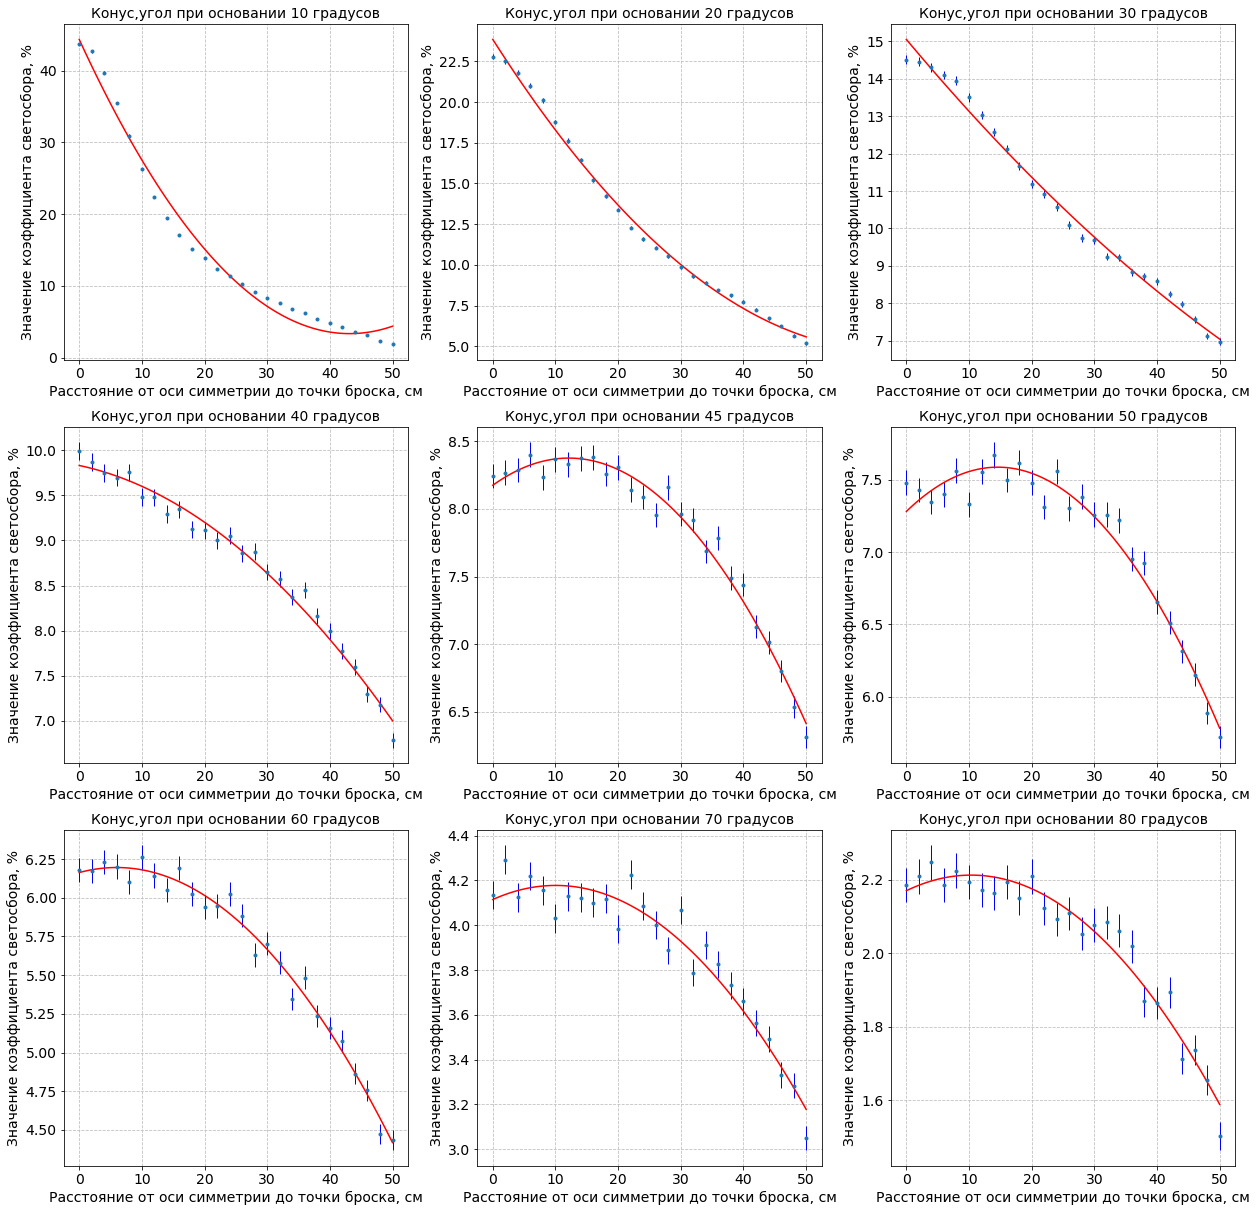

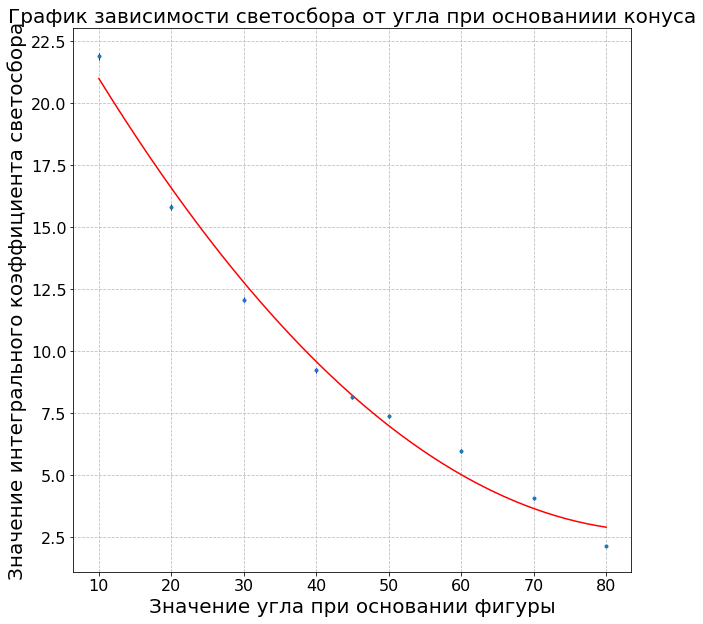

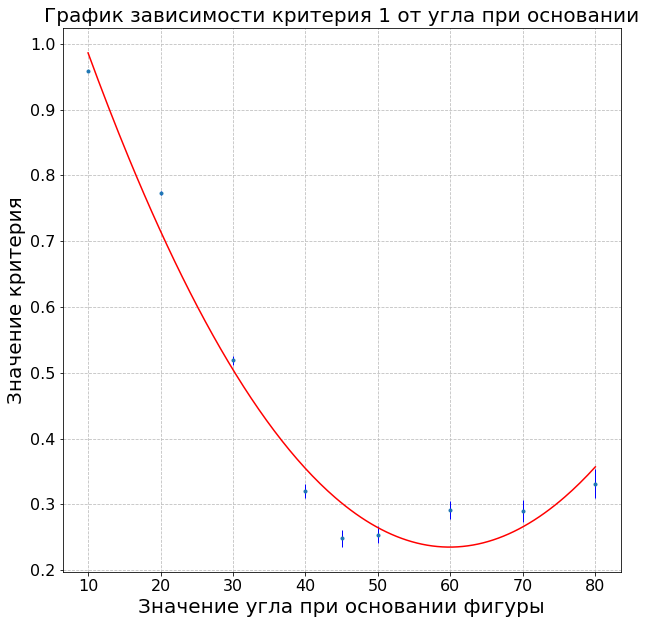

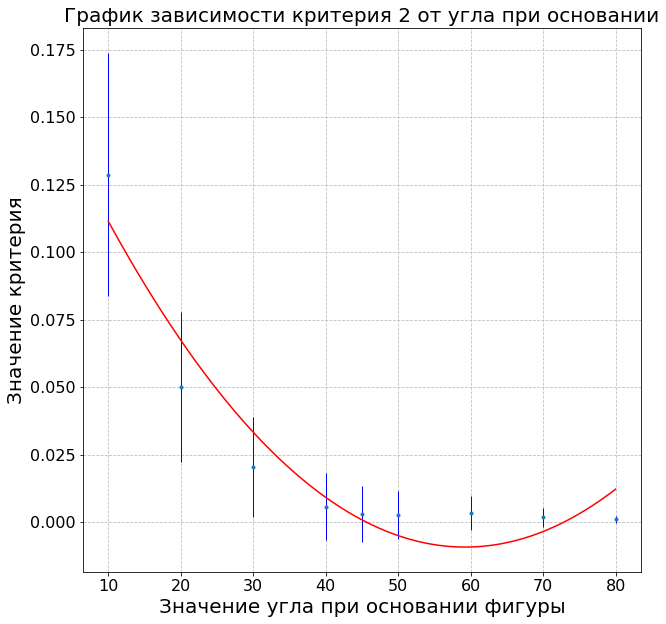

In [11]:
### Чтение данных. Запущено в каждой точке по 100000 фотонов
for i in range(9):           
    file_name=r"D:\figures\конус\deegres8\%d.txt"%(angle[i])
    file=open(file_name, 'r')
    print(file_name)
    for j in range (26):    
        line=file.readline()
        t=int(line)
        photon[j][i]=t
        
### Массив из значений ошибок для каждой точки бросания        
errph[:,:]=photon[:,:]**(1/2)

### Рассчет интегрального коэффициента светосбора с погрешностью для каждой фигуры
### Рассчет среднего числа собранных фотонов с погрешностью для каждой фигуры
light=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*photon[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
lighterr=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*errph[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (9)])
midpho=np.array([ float(light[i]*100) for i in range (9)])
midphoerr=np.array([ float(lighterr[i]*100) for i in range (9)])

### Рассчет знчения критерия 1 (ищется относительное значение разброса между максимально собранным числом фотонов
### и минимальным значением) c погрешностью
kr1=np.array([ float((photon[:,i].max()-photon[:,i].min())/photon[:,i].max()) for i in range (9)])
kr1err=np.array([float((1-kr1[i])*((errph[:,i].max()/photon[:,i].max())**2+
                                   (errph[:,i].min()/photon[:,i].min())**2)**(1/2)) for i in range (9)])

### Рассчет критерия 2 (оценка дисперсии для каждонго угла)  с погрешностью
kr2=np.array([ float((sum((light[i]/100-photon[:,i]/100000)**2*PI*
                          (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (9)])
kr2err=np.array([float((sum(2*((light[i]/100-photon[:,i]/100000)**2*
                               (lighterr[i]/100)**2 + (light[i]-photon[:,i]/100000)**2*(errph[:,i]/100000)**2)*PI*
                            (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (9)])  
        
### Построение графиков зависимости зарегистрированных фотонов от расстояния до оси симметрии
plt.figure(figsize=(21, 21))
for i in range (9):
    #plt.figure(i, figsize=(10, 10))
    plt.subplot(3,3,i+1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.xlabel('Расстояние от оси симметрии до точки броска, см', size = '14')
    plt.ylabel('Значение коэффициента светосбора, %', size = '14')
    plt.title('Конус,угол при основании %d градусов' %(angle[i]), size = '14')
    hk=photon[:,i]/1000
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    print('-------------------------------------------------------------------')
    
    ### Рассчет коэффициента детерминации - оценки качества приближения
    z=np.polyfit(distance,hk,2)
    determination(distance,hk,z)
    
    ### Вывод остального нужного   
    print('Функция аппроксимирующей кривой y=%fx^2+%fx+%f' %(z[0], z[1], z[2]))
    print('Иттегральный коэффициент светосбора %f +/- %f' %(light[i], lighterr[i]))
    print('Среднее число собранных фотонов %f +/- %f ' %(midpho[i], midphoerr[i]))
    print('Значение критерия 1 - %f  +/- %f ' %(kr1[i], kr1err[i]))
    print('Значение критерия 2 - %f  +/- %f ' %(kr2[i], kr2err[i]))
    print('-------------------------------------------------------------------')
    dis1=np.linspace(0,50,num=100)
    plt.plot(dis1, z[0]*(dis1)**2+ z[1]*(dis1)+z[2], 'r', label='Fitted line')
    plt.errorbar(distance, hk, yerr=errph[:,i]/1000,fmt='.', ecolor='b', linewidth=1, label='Dots with errors')
    
### Построение графика для интегрального коэффициента светосбора    
plt.figure(10, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости светосбора от угла при основаниии конуса', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение интегрального коэффициента светосбора', size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z=np.polyfit(angle,light,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Интегральный светосбор')
determination(angle,light,z)
print('-------------------------------------------------------------------')  

###    
dis2=np.linspace(10,80,num=200)
plt.plot(dis2, z[0]*(dis2)**2+ z[1]*(dis2)+z[2], 'r')
plt.errorbar(angle, light, yerr=lighterr,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 1
plt.figure(11, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 1 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr1,2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий первый')
determination(angle,kr1,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr1, yerr=kr1err,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 2
plt.figure(12, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 2 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия',size = '20')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
z1=np.polyfit(angle,kr2,2)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий второй')
determination(angle,kr2,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr2, yerr=kr2err,fmt='.', ecolor='b', linewidth=1)